## Ampatin LSTM Q2

In [1]:
#import libraries needed
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

#import tools needed
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

plt.style.use('fivethirtyeight')

In [2]:
#get the data
ALI = pd.read_csv('AYAAF.csv')

#show the data
print(ALI)

           Date  Open  High   Low  Close  Adj Close  Volume
0    10/12/2020  0.62  0.62  0.62   0.62   0.610634       0
1    10/13/2020  0.62  0.62  0.62   0.62   0.610634       0
2    10/14/2020  0.62  0.62  0.62   0.62   0.610634       0
3    10/15/2020  0.62  0.62  0.62   0.62   0.610634     800
4    10/16/2020  0.62  0.62  0.62   0.62   0.610634       0
..          ...   ...   ...   ...    ...        ...     ...
497   10/3/2022  0.48  0.48  0.48   0.48   0.480000       0
498   10/4/2022  0.48  0.48  0.48   0.48   0.480000       0
499   10/5/2022  0.48  0.48  0.48   0.48   0.480000       0
500   10/6/2022  0.48  0.48  0.48   0.48   0.480000       0
501   10/7/2022  0.48  0.48  0.48   0.48   0.480000       0

[502 rows x 7 columns]


In [3]:
#get the number of rows and columns
ALI.shape

(502, 7)

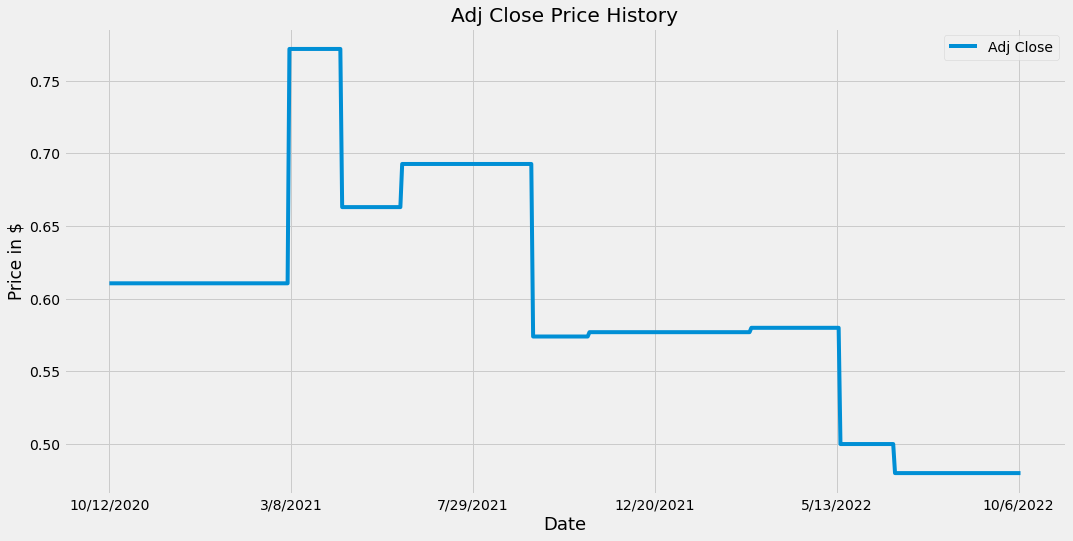

In [4]:
#plotting the adj close price history
data = pd.DataFrame(ALI, columns=["Date", "Adj Close"])
data.plot(x='Date', y=['Adj Close'], kind='line', figsize=(16,8))
plt.title('Adj Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price in $')
plt.show()

In [5]:
#create a new dataframe with only the Adj Close column
data = ALI.filter(['Adj Close'])

#convert dataframe to a numpy array
dataset = data.values

#get the number of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

402

In [6]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.44745027],
       [0.447

In [7]:
#create the train dataset and the scaled of training dataset
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027,
       0.44745027, 0.44745027, 0.44745027, 0.44745027, 0.44745027])]
[0.44745026579711755]



In [8]:
#converting the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(342, 60, 1)

In [10]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#training the model
model.fit(x_train, y_train, batch_size=1, epochs=15)

Epoch 1/15
342/342 [==============================] - 22s 36ms/step - loss: 0.0151
Epoch 2/15
342/342 [==============================] - 12s 35ms/step - loss: 0.0075
Epoch 3/15
342/342 [==============================] - 12s 35ms/step - loss: 0.0055
Epoch 4/15
342/342 [==============================] - 13s 37ms/step - loss: 0.0046
Epoch 5/15
342/342 [==============================] - 14s 40ms/step - loss: 0.0045
Epoch 6/15
342/342 [==============================] - 13s 37ms/step - loss: 0.0036
Epoch 7/15
342/342 [==============================] - 12s 35ms/step - loss: 0.0038
Epoch 8/15
342/342 [==============================] - 12s 35ms/step - loss: 0.0036
Epoch 9/15
342/342 [==============================] - 13s 38ms/step - loss: 0.0032
Epoch 10/15
342/342 [==============================] - 17s 49ms/step - loss: 0.0026
Epoch 11/15
342/342 [==============================] - 15s 44ms/step - loss: 0.0032
Epoch 12/15
342/342 [==============================] - 14s 40ms/step - loss: 0.0026
E

In [13]:
#creating the test dataset and a new array containing scaled values from index 342 to 502
test_data = scaled_data[training_data_len - 60: , :]

#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#converting data to a numpy array
x_test = np.array(x_test)

In [15]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 3s 26ms/step


In [17]:
#get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.006112569808959974

C:\Users\camil\AppData\Local\Temp\ipykernel_8508\1249658927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


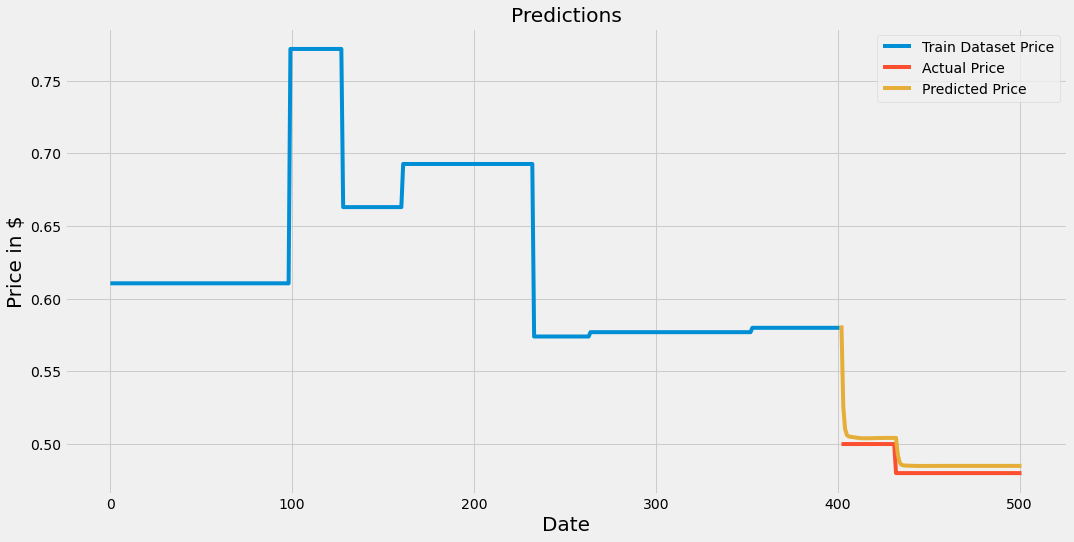

In [18]:
#plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#plotting the predicted value together with actual value
plt.figure(figsize=(16,8))
plt.title('Predictions')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price in $', fontsize=20)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train Dataset Price', 'Actual Price', 'Predicted Price'], loc='upper right')
plt.show()

In [19]:
#show the actual value and predicted price
valid

,Adj Close,Predictions
402,0.50,0.581638
403,0.50,0.525719
404,0.50,0.510220
405,0.50,0.506138
406,0.50,0.505223
...,...,...
497,0.48,0.484951
498,0.48,0.484951
499,0.48,0.484951
500,0.48,0.484951


Predicting the stock price for Oct 12, 2022 to Oct 19, 2022

In [20]:
#get againg the dataset
ayala_land_inc = pd.read_csv('AYAAF.csv')

#creating a new dataframe
new_df = ayala_land_inc.filter(['Adj Close'])

#getting the last 60 days adj close values and convert the dataframe to an array
last_60 = new_df[-60:].values

#scaling the data to be values between 0 and 1
last_60_scaled = scaler.transform(last_60)

#create an empty list
X_test = []

#append the last 60 days
X_test.append(last_60_scaled)

#converting the X_test dataset to a numpy array
X_test = np.array(X_test)

#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#getting the predicted scaled price
predicted_price = model.predict(X_test)

#undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

1/1 [==============================] - 0s 42ms/step
[[0.48495138]]
